In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
bike_rentals = pd.read_csv("../input/bike-rental-hour/bike_rental_hour.csv", index_col="instant")

In [7]:
bike_rentals.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


(array([ 13.,  62.,  71.,  73., 122., 137.,  81.,  76.,  79.,  17.]),
 array([  22. ,  891.2, 1760.4, 2629.6, 3498.8, 4368. , 5237.2, 6106.4,
        6975.6, 7844.8, 8714. ]),
 <a list of 10 Patch objects>)

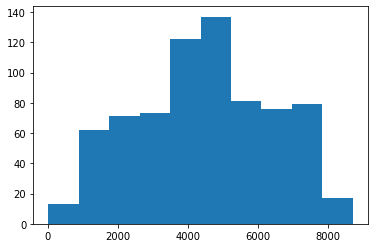

In [8]:
%matplotlib inline


plt.hist(bike_rentals["cnt"])

In [9]:
bike_rentals.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


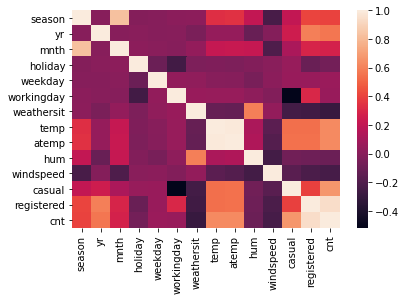

In [10]:
sns.heatmap(bike_rentals.corr())

In [11]:
def hour_car(hour):
    if hour >= 6 & hour < 12:
        return 1
    if hour >= 12 & hour < 18:
        return 2
    if hour >= 18 & hour < 24:
        return 3
    if hour >= 0 & hour < 6:
        return 4

In [12]:
bike_rentals["time_label"] = bike_rentals["hr"].apply(hour_car)

KeyError: 'hr'

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(bike_rentals, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
features = ["yr", "hr", "temp", "hum"]
X = train[features]
y = train ["cnt"]

X_test = test[features]
y_test = test["cnt"]

In [ ]:
model_full = LinearRegression()
model_full.fit(X,y)

In [ ]:
train_predictions = model_full.predict(X)
test_predictions = model_full.predict(test[features])

Let's calculate the mean squared error for both our test and training sets

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_error = mean_squared_error(train["cnt"], train_predictions)
train_score = model_full.score(X,y)
test_error = mean_squared_error(test["cnt"], test_predictions)
test_score = model_full.score(X_test,y_test)

print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

Pretty happy with that.  We're accounting for approx 40% of variance and the error between our test and training set is pretty similar

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_model = DecisionTreeRegressor(random_state=1)
tree_model.fit(X,y)

In [ ]:
train_tree_predictions = tree_model.predict(X)
test_tree_predictions =  tree_model.predict(test[features])

In [ ]:
train_error = mean_squared_error(train["cnt"], train_tree_predictions)
train_score = tree_model.score(X,y)
test_error = mean_squared_error(test["cnt"], test_tree_predictions)
test_score = tree_model.score(X_test,y_test)

print("Evaluating our decision tree model")
print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

Now, using min_samples_leaf=2

In [ ]:
tree_model = DecisionTreeRegressor(random_state=1, min_samples_leaf=2)
tree_model.fit(X,y)
train_tree_predictions = tree_model.predict(X)
test_tree_predictions =  tree_model.predict(test[features])

train_error = mean_squared_error(train["cnt"], train_tree_predictions)
train_score = tree_model.score(X,y)
test_error = mean_squared_error(test["cnt"], test_tree_predictions)
test_score = tree_model.score(X_test,y_test)

print("Evaluating our decision tree model")
print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

max_depth=10?

In [ ]:
tree_model = DecisionTreeRegressor(random_state=1, max_depth=10)
tree_model.fit(X,y)
train_tree_predictions = tree_model.predict(X)
test_tree_predictions =  tree_model.predict(test[features])

train_error = mean_squared_error(train["cnt"], train_tree_predictions)
train_score = tree_model.score(X,y)
test_error = mean_squared_error(test["cnt"], test_tree_predictions)
test_score = tree_model.score(X_test,y_test)

print("Evaluating our decision tree model")
print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

Pretty happy with that last model.  Good eror and accurate on test and train set.  Let's compare to random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(min_samples_leaf=7)

rf_model.fit(X,y)
train_rf_predictions = rf_model.predict(X)
test_rf_predictions =  rf_model.predict(test[features])

train_error = mean_squared_error(train["cnt"], train_rf_predictions)
train_score = rf_model.score(X,y)
test_error = mean_squared_error(test["cnt"], test_rf_predictions)
test_score = rf_model.score(X_test,y_test)

print("Evaluating our random forest model")
print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

In [ ]:
rf_model = RandomForestRegressor(n_estimators=20, min_samples_leaf=7)

rf_model.fit(X,y)
train_rf_predictions = rf_model.predict(X)
test_rf_predictions =  rf_model.predict(test[features])

train_error = mean_squared_error(train["cnt"], train_rf_predictions)
train_score = rf_model.score(X,y)
test_error = mean_squared_error(test["cnt"], test_rf_predictions)
test_score = rf_model.score(X_test,y_test)

print("Evaluating our random forest model")
print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

Interestingly, we don't see massive increase going from decision tree to random forest

So, using 
features = ["yr", "hr", "temp", "hum"]
Evaluating our random forest model
Training error is 6381.1648412312015
Training score is 0.8078073825438481
Test error is 7844.944677615666
Test score is 0.7522550838117901

Is about as good as it gets.  Let's try throwing all our features at it and seing waht happens.

In [ ]:
predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

X_train = train[predictors]
y_train = train ["cnt"]

X_test = test[predictors]
y_test = test["cnt"]

In [ ]:
tree_model = DecisionTreeRegressor(random_state=1, max_depth=10)
tree_model.fit(X_train,y_train)
train_tree_predictions = tree_model.predict(X_train)
test_tree_predictions =  tree_model.predict(test[predictors])

train_error = mean_squared_error(train["cnt"], train_tree_predictions)
train_score = tree_model.score(X_train,y_train)
test_error = mean_squared_error(test["cnt"], test_tree_predictions)
test_score = tree_model.score(X_test,y_test)

print("Evaluating our decision tree model")
print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

In [ ]:
rf_model = RandomForestRegressor(n_estimators=20, min_samples_leaf=7)

rf_model.fit(X_train,y_train)
train_rf_predictions = rf_model.predict(X_train)
test_rf_predictions =  rf_model.predict(test[predictors])

train_error = mean_squared_error(train["cnt"], train_rf_predictions)
train_score = rf_model.score(X_train,y_train)
test_error = mean_squared_error(test["cnt"], test_rf_predictions)
test_score = rf_model.score(X_test,y_test)

print("Evaluating our random forest model")
print ("Training error is " +str(train_error))
print ("Training score is " +str(train_score))
print("Test error is " + str(test_error))
print ("Test score is " +str(test_score))

Turns out adding those features MASSIVELY improves my accuracy!  Let's see what features it's using

In [ ]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')